In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

In [2]:
def sharpe(x):
    return np.mean(x)/np.std(x)

In [3]:
NROW = 350000
target_col = "NZDUSD"




In [4]:
df = pd.read_csv("x_82_ETF_FOREX_5MIN_RETONLY.csv", nrows = NROW)
df["Date"] = pd.to_datetime(df["Date"] )

In [5]:
df.fillna(method = "ffill", inplace = True)

In [6]:
selected_col = df.columns[df.apply(lambda x: x.isnull()).apply(np.mean) < 0.05]
new_df = df[selected_col].copy()
new_df.dropna(inplace = True)
print(new_df.shape)


(350000, 51)


In [7]:
NROW

350000

In [8]:
selected_col

Index(['Date', 'AUDUSD', 'EURUSD', 'EURGBP', 'EURJPY', 'EWH', 'EWZ', 'FXI',
       'IAU', 'EZU', 'KRE', 'LQD', 'NZDUSD', 'EEM', 'EFA', 'GDX', 'HYG', 'SPY',
       'XLU', 'IYR', 'GLD', 'EWT', 'IEF', 'AGG', 'UNG', 'USDJPY', 'GBPUSD',
       'USDCAD', 'SLV', 'RSX', 'EWJ', 'OIH', 'SMH', 'XLB', 'TLT', 'USDCHF',
       'USO', 'XLF', 'XLK', 'XLP', 'XOP', 'VEA', 'VWO', 'XLE', 'XLI', 'XLV',
       'XRT', 'XLY', 'VNQ', 'EWW', 'XBI'],
      dtype='object')

In [9]:
df1 = new_df.copy().sort_values('Date').set_index('Date')
df1["hour"] = df1.index.hour
df1["minute"] = df1.index.minute
df1["weekday"] = df1.index.weekday
df1["hour"] = df1.index.hour

# df1["target"] = df1.rolling(window = 10)[target_col].apply(lambda x: np.mean(x > 0), raw = True).shift(-10)
df1["target"] = df1.rolling(window = 10)[target_col].apply(lambda x: sharpe(x), raw = True).shift(-10)
df1.dropna(inplace = True)


In [10]:
hh = df1.groupby("hour")["SPY"].apply(lambda x: np.mean(x)!=0)
# print(df1.groupby(["hour", "minute"])["SPY"].apply(lambda x: np.mean(x==0))) 
hh = df1.groupby(["hour", "minute"])["SPY"].apply(lambda x: np.mean(x==0) < 0.9)


In [11]:
df1 = df1.reset_index().set_index(["hour", "minute"]).loc[hh].reset_index().set_index("Date")
print(np.mean(df1["target"]==0))

0.0


In [12]:
df1

,hour,minute,AUDUSD,EURUSD,EURGBP,EURJPY,EWH,EWZ,FXI,IAU,...,XLE,XLI,XLV,XRT,XLY,VNQ,EWW,XBI,weekday,target
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-05 09:45:00,9,45,-0.000318,0.000065,0.000000,0.000393,-0.002500,-0.000107,-0.000921,0.001168,...,0.001551,0.001551,0.000626,-0.001809,-0.001523,-0.000299,0.000842,-0.002090,0,-0.028512
2008-05-05 09:50:00,9,50,0.000000,0.000258,0.000000,0.000000,0.000000,0.000427,0.001660,0.002334,...,0.000774,0.000774,0.000000,0.003625,0.002440,0.002090,0.002693,0.000000,0,0.028493
2008-05-05 09:55:00,9,55,0.000000,-0.000278,-0.000025,0.000959,0.003008,0.002884,0.002025,-0.001164,...,0.000258,0.000258,0.000939,0.000000,0.000000,0.000894,-0.000336,0.001047,0,0.142944
2008-05-05 10:00:00,10,0,-0.000021,-0.000355,0.000025,-0.000307,-0.000500,0.001172,-0.000919,-0.001166,...,-0.001031,-0.001031,-0.000313,0.000000,-0.000608,0.002084,-0.000168,0.000000,0,0.340784
2008-05-05 10:05:00,10,5,0.000000,-0.001182,-0.000776,0.000000,-0.000500,0.000000,-0.000919,-0.001167,...,-0.001033,-0.001033,0.000000,0.001204,0.000609,0.002080,0.001008,0.001569,0,0.340784
2008-05-05 10:10:00,10,10,-0.000191,-0.000705,-0.000751,0.000430,0.003002,0.001915,0.002577,-0.003505,...,0.003101,0.003101,0.002502,0.007216,0.005780,0.003261,0.003188,0.001567,0,0.437252
2008-05-05 10:15:00,10,15,-0.001484,-0.000971,-0.000637,0.000000,-0.000499,-0.001487,-0.000918,0.002345,...,-0.001030,-0.001030,0.000312,-0.001791,-0.000907,-0.000591,-0.001673,0.000000,0,0.477255
2008-05-05 10:20:00,10,20,0.000531,0.000583,0.000255,-0.000651,-0.002495,-0.003084,-0.003124,-0.001170,...,-0.002063,-0.002063,-0.002183,-0.005383,-0.004239,-0.002513,-0.001173,-0.002086,0,0.227637
2008-05-05 10:25:00,10,25,0.000743,0.000000,0.000637,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.243605


In [13]:
x_df_raw = df1.copy().drop("target", axis = 1)
y_df_raw = df1.copy()[["target"]]


In [14]:
NROW = df1.shape[0]
print(df1.shape)

(95097, 54)


In [15]:
scaler = sklearn.preprocessing.StandardScaler()
# scaler = sklearn.preprocessing.MinMaxScaler()
u1 = int(NROW*0.6)
u2 = int(NROW*0.8)
u3 = NROW
x_train_df, x_val_df, x_test_df = x_df_raw[0:u1],x_df_raw[u1:u2],x_df_raw[u2:u3]
y_train_df, y_val_df, y_test_df = y_df_raw[0:u1],y_df_raw[u1:u2],y_df_raw[u2:u3]


In [16]:
# x_train = scaler.fit_transform(x_train_df.values)
# x_val = scaler.transform(x_val_df.values)
# x_test = scaler.transform(x_test_df.values)
x_train = x_train_df.values
x_val = x_val_df.values
x_test = x_test_df.values

y_train = y_train_df["target"].values
y_val = y_val_df["target"].values
y_test = y_test_df["target"].values



In [17]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)


In [18]:
xgb_model = xgb.XGBRegressor()
clf2 = GridSearchCV(xgb_model, {'max_depth': [3],
                               'n_estimators': np.arange(100,120,2),
                               'gamma': [1],
                                'learning_rate': np.arange(0.05,0.07, 0.002),
                              }, verbose=1,
                   n_jobs=4)
# clf2.fit(x_train, y_train)

In [19]:
# print(clf2.best_score_)
# print(clf2.best_params_)
# clf.cv_results_


In [20]:
xgb_model_2 = xgb.XGBRegressor(max_depth = 3, learning_rate = 0.06, n_estimators = 100)
xgb_model_2.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
y_pred_val = xgb_model_2.predict(x_test)
y_true_val = y_test

In [22]:
import matplotlib.pyplot as plt
# plt.plot(y_pred_val)

xdf = pd.DataFrame(dict(actual = y_true_val, pred = y_pred_val))

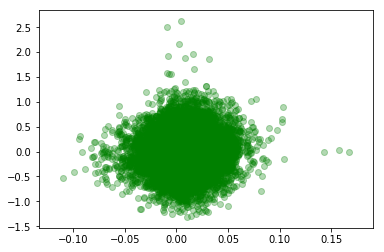

In [23]:
plt.scatter(y_pred_val, y_true_val, color='green', marker='o', alpha = 0.3)

(array([ 5., 11., 15., 23., 51., 31., 25., 15.,  4.,  4.]),
 array([-0.79155393, -0.60606202, -0.42057011, -0.23507819, -0.04958628,
         0.13590563,  0.32139754,  0.50688945,  0.69238137,  0.87787328,
         1.06336519]),
 <a list of 10 Patch objects>)

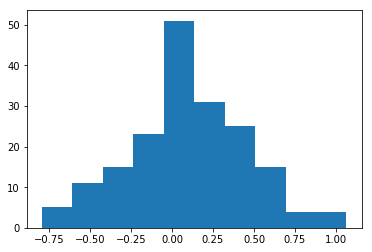

In [24]:
threshold = 0.055

z = y_true_val[y_pred_val>threshold]

plt.hist(z)


In [25]:
cm = sklearn.metrics.confusion_matrix(y_pred = 1*np.array(y_pred_val>threshold), y_true = 1*np.array(y_true_val > threshold))
print(cm)

[[10617    80]
 [ 8219   104]]


In [48]:
x_list = []
y_list = []
min_sharpe_pred = []
t25_sharpe_pred = []
t50_sharpe_pred = []
t75_sharpe_pred = []
max_sharpe_pred = []
prop_p = []
upper_q = 75
lower_q = 25
for threshold in np.arange(0.0, 0.2, 0.001):
    cm = sklearn.metrics.confusion_matrix(y_pred = 1*np.array(y_pred_val>threshold), y_true = 1*np.array(y_true_val > threshold))
    xx = np.mean(1*np.array(y_true_val > threshold))
    yy = cm[1,1]/(cm[1,1] + cm[0,1])
    
    z = y_true_val[y_pred_val>threshold]
#     prop = len(z)/len(y_true_val)
    prop = (len(z))
    min_sharpe = np.min(z)
    t25_sharpe = np.percentile(z, q=lower_q)
    t50_sharpe = np.percentile(z, q=50)
    t75_sharpe = np.percentile(z, q=upper_q)
    max_sharpe = np.max(z)
    if prop < 1000:
        break
#     print(len(z), min_sharpe, t25_sharpe, t75_sharpe, max_sharpe, aa)
    
    

    
    
    min_sharpe_pred.append(min_sharpe)
    t25_sharpe_pred.append(t25_sharpe)
    t50_sharpe_pred.append(t50_sharpe)
    t75_sharpe_pred.append(t75_sharpe)
    max_sharpe_pred.append(max_sharpe)
    prop_p.append(prop)
    
    x_list.append(threshold)
    y_list.append((yy-xx)*np.sqrt(np.log(prop)))

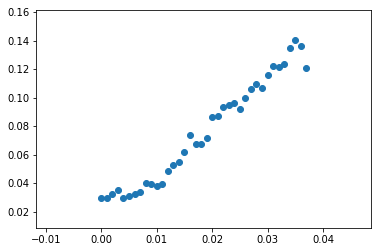

In [49]:
plt.scatter(x_list, y_list)
# 

[0.22881706 0.22969069 0.23127998 0.2315236  0.23109247 0.23173785
 0.2341038  0.23597489 0.23753831 0.23727463 0.23703437 0.23780552
 0.2380551  0.23982026 0.24045001 0.24129906 0.2429263  0.24349123
 0.24290966 0.24477742 0.24706066 0.25017112 0.25417831 0.25542749
 0.25475477 0.25602564 0.25971735 0.26216315 0.2598809  0.26091004
 0.26277381 0.25971735 0.26040489 0.26380591 0.27048504 0.27558924
 0.27099923 0.26978604]
[-0.22105435 -0.2195859  -0.21909892 -0.21901458 -0.2192073  -0.21866552
 -0.21860352 -0.21734531 -0.21697989 -0.21749433 -0.21694008 -0.2160873
 -0.21413914 -0.21348108 -0.21390098 -0.21258499 -0.21213288 -0.21271953
 -0.21308125 -0.21220519 -0.21080906 -0.21081302 -0.21103238 -0.20497385
 -0.20514701 -0.20604349 -0.20437402 -0.20504654 -0.20268717 -0.20256978
 -0.1981796  -0.19601718 -0.19156275 -0.19020517 -0.18535524 -0.18018417
 -0.18148771 -0.18907631]


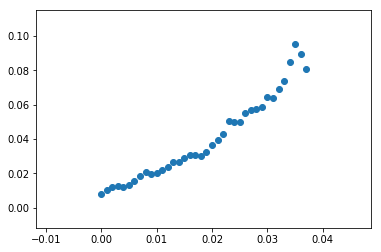

In [50]:
# plt.scatter(x_list, min_sharpe_pred, marker='^')
# plt.scatter(x_list, t25_sharpe_pred, marker='o')
# plt.scatter(x_list, t50_sharpe_pred, marker='o')
# plt.scatter(x_list, t75_sharpe_pred, marker='o')
plt.scatter(x_list, np.array(t75_sharpe_pred) + np.array(t25_sharpe_pred), marker='o')
# plt.scatter(x_list, prop_p, marker='o')
# plt.scatter(x_list, max_sharpe_pred, marker='o')
# 
print(np.array(t75_sharpe_pred))
print(np.array(t25_sharpe_pred))

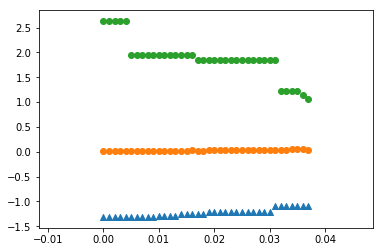

In [53]:
plt.scatter(x_list, min_sharpe_pred, marker='^')
# plt.scatter(x_list, t25_sharpe_pred, marker='o')
plt.scatter(x_list, t50_sharpe_pred, marker='o')
# plt.scatter(x_list, t75_sharpe_pred, marker='o')
# plt.scatter(x_list, np.array(t75_sharpe_pred) - np.array(t25_sharpe_pred), marker='o')
# plt.scatter(x_list, prop_p, marker='o')
plt.scatter(x_list, max_sharpe_pred, marker='o')


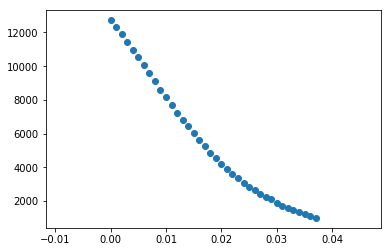

In [52]:
plt.scatter(x_list, prop_p, marker='o')

In [40]:
target_col

'NZDUSD'

In [41]:
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weights = class_weights/class_weights[0]
# class_weights_dict = dict(enumerate(class_weights))
# print(class_weights_dict)

In [42]:
# param = {
#         'booster': 'dart',
#          'eta': 0.05, 'gamma':2, 'max_depth': 3, 
#          'min_child_weight': 1, 'max_delta_step':1,
#          'silent': 1, 
#          'subsample': 0.8,
#          'colsample_bytree': 0.8,
#          'lambda': 1,
#          'alpha': 0,         
# #          'scale_pos_weight': class_weights_dict[1]*1.0,
# #         'eval_metric': 'auc',
#          'eval_metric': 'error',
# #         'eval_metric': 'logloss',
#          'objective': 'binary:logistic',
#          'tree_method': "gpu_hist"
# #          'nthread': 4,
#          }
# num_round = 100
# evallist = [(dtrain, 'train'), (dval, 'eval')]
# evals_result = {}
# model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds = 10, evals_result = evals_result)

# xgb.plot_importance(model, max_num_features=20, height=0.8)
# plt.show()
